**Cofi Slim: A full history of Bloomberg Company Financials in one place**

- Fields: list supported @ https://docs.google.com/spreadsheets/d/1Z0SdHMhST9UMooVSWsEZB26TTSylt3glIU0xrWB41U8/edit#gid=0
- Global company examples (id_bb_company) in this testing notebook: ['101743','13561981', '101534', '111680', '118412', '100232', '115114', '115709', '111100' , '179551', '11092218']

In [1]:
%%capture
!pip install bloomberg.es.lacus.location
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyarrow.dataset as ds

from bloomberg.es.lacus.location import LacusLocation

pd.set_option("max_columns", None)
pd.set_option("max_rows", 500)

##### User inputs 1

In [14]:
company = 101534  # Select a companies id 
item = "bs_tot_cap"  # Select the metric or feature
period = "A"  # Select period (A for Annual, Q for namr interims & S for elsewehre interims)
flavour = pit # Select latest or pit (optional)

In [5]:
# select cofi item from list above
cols = [
    
    "id_bb_company",
    "long_comp_name",
    "eqy_fund_year",
    "latest_period_end_dt_full_record",
    "fund_per",
    "rank_num",
    "sequence_num",
    "dl_snapshot_date_source",
    "eqy_fund_crncy",
    item
]

# Only run these if you are pulling all period types
#cofiSlim["fund_per"] = pd.Categorical(cofiSlim["fund_per"], ["Q1", "Q2", "Q3", "Q4", "S1", "S2", "A"])

drops = [
    
    "id_bb_company",
    "long_comp_name",
    "eqy_fund_year",
    "fund_per",
    "eqy_fund_crncy",
    "latest_period_end_dt_full_record",
    item
]

pit = [
    
    "id_bb_company",
    "long_comp_name",
    "eqy_fund_year",
    "fund_per",
    "latest_period_end_dt_full_record",
    "dl_snapshot_date_source",
    "eqy_fund_crncy"
]

latest = [
    
    "id_bb_company",
    "long_comp_name",
    "eqy_fund_year",
    "fund_per",
    "latest_period_end_dt_full_record",
    "eqy_fund_crncy",
    
]

# Sample List of companies
companies = (
    101743, # MSFT US Equity
    13561981, # V US Equity
    101534, # ULVR LN Equity
    111680, # DGE LN Equity
    118412, # SAP GY Equity
    100232, # BHP AT Equity
    115114, #7203 JT Equity (Toyota)
    115709, # DBS SP Equity
    111100, # ANTO LN Equity
    179551, # CNI US Equity
    11092218, # FB US Equity
    69466781, # COIN US Equity
    130891 # 000002 CH Equity (CHINA VANKE CO LTD -A)
)
filters = [f"id_bb_company in {companies}"]

# Dates for pull (current & hist)
sm_st = "2020-01-01"
sm_end = "2021-01-01"

st_dt = "1980-01-01"
end_dt = "2021-04-01"

hist_st_dt = "1980-01-01"
hist_end_dt = "2019-09-30"

items = [
    "bs_other_intangible_assets",
    "bs_cash_near_cash_item",
    "bs_acct_note_rcv",
    "bs_inventories",
    "bs_cur_asset_report",
    "bs_net_fix_asset",
    "bs_tot_asset",
    "bs_acct_payable",
    "bs_st_borrow",
    "bs_cur_liab",
    "bs_lt_borrow",
    "bs_pfd_eqty_and_hybrid_cptl",
    "minority_noncontrolling_interest",
    "bs_sh_out",
    "bs_curr_portion_lt_debt",
    "bs_tot_liab2",
    "bs_tot_cap",
    "total_equity",
    "tot_common_eqy",
    "tang_book_val_per_sh",
    "tot_debt_to_tot_asset",
    "cur_ratio",
    "working_capital",
    "net_debt",
    "short_and_long_term_debt",
    "tot_debt_to_tot_eqy",
    "px_to_book_ratio",
    "bs_num_of_tsy_sh",
    "cash_flow_per_sh",
    "px_to_cash_flow",
    "ev_to_t12m_ebitda",
    "earn_yld",
    "revenue_per_sh",
    "return_com_eqy",
    "return_on_inv_capital",
    "return_on_asset",
    "pe_ratio",
    "px_to_sales_ratio",
    "cf_net_inc",
    "cf_depr_amort",
    "cf_cash_from_oper",
    "cf_cap_expend_prpty_add",
    "cf_cash_from_inv_act",
    "cf_dvd_paid",
    "cf_cash_from_fnc_act",
    "cf_decr_lt_borrow",
    "cf_depr_exp",
    "cf_nt_csh_rcvd_pd_for_acquis_div",
    "chng_work_cap",
    "cf_free_cash_flow",
    "free_cash_flow_yield",
    "sales_rev_turn",
    "is_cogs_to_fe_and_pp_and_g",
    "is_operating_expn",
    "is_oper_inc",
    "is_int_expense",
    "is_inc_tax_exp",
    "min_noncontrol_interest_credits",
    "net_income",
    "is_eps",
    "is_diluted_eps",
    "is_earn_bef_xo_items_per_sh",
    "is_cap_int_exp",
    "is_basic_eps_cont_ops",
    "is_dil_eps_cont_ops",
    "is_dil_eps_bef_xo",
    "ebit",
    "ebitda",
    "eqy_dps",
    "gross_margin",
    "interest_coverage_ratio",
    "net_rev",
    "prof_margin",
    "ebitda_to_revenue",
    "is_avg_num_sh_for_eps",
]

In [8]:
cofiSlim = LacusLocation(
    data_name="cofi_slim_20210625",
    db_name="qrp",
    #start_date=st_dt,
    #end_date=end_dt,
    date_col="dl_snapshot_date_source",
    catalog="icebergdev",
    filters=filters,
    columns=cols,
).get(df_type="pandas")

Toolkit Username:  ············
Toolkit Password:  ···········


##### User input 2

In [15]:
flavour = pit # Select latest or pit

/python3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/python3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/python3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


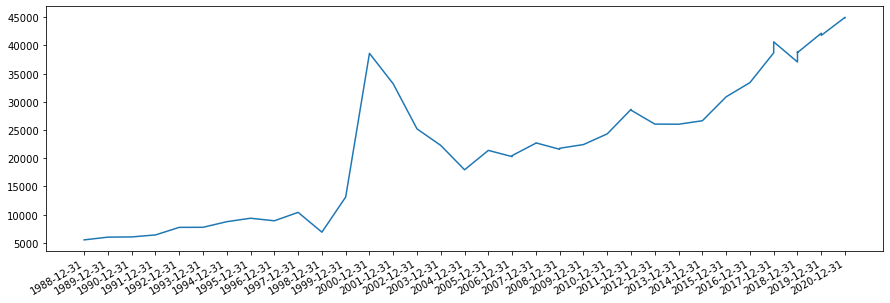

,id_bb_company,long_comp_name,eqy_fund_year,latest_period_end_dt_full_record,fund_per,rank_num,sequence_num,dl_snapshot_date_source,eqy_fund_crncy,bs_tot_cap
5058,101534,Unilever PLC,2020,2020-12-31,A,3,18,2021-03-11,EUR,44902.0
5044,101534,Unilever PLC,2020,2020-12-31,A,2,4,2021-02-04,EUR,44960.0
12895,101534,Unilever PLC,2019,2019-12-31,A,3,23,2020-03-10,EUR,41761.0
12876,101534,Unilever PLC,2019,2019-12-31,A,2,4,2020-01-30,EUR,42143.0
16383,101534,Unilever PLC,2018,2018-12-31,A,4,38,2020-03-10,EUR,38711.0
16381,101534,Unilever PLC,2018,2018-12-31,A,4,36,2019-08-03,EUR,38855.0
16369,101534,Unilever PLC,2018,2018-12-31,A,3,24,2018-12-31,EUR,37049.0
14939,101534,Unilever PLC,2017,2017-12-31,A,4,28,2020-12-22,EUR,40615.0
14930,101534,Unilever PLC,2017,2017-12-31,A,3,19,2017-12-31,EUR,38670.0
2294,101534,Unilever PLC,2016,2016-12-31,A,3,18,2016-12-31,EUR,33390.0


In [16]:
results = cofiSlim[cols] \
    .loc[(cofiSlim["id_bb_company"].isin([company])) & (cofiSlim["fund_per"].str.contains(period))] \
    .dropna(subset=[item, "latest_period_end_dt_full_record"]) \
    .sort_values(["eqy_fund_year", "fund_per", "rank_num", "sequence_num"], ascending = (False, False, False, False)) \
    .drop_duplicates(subset=drops, keep='last') \
    .drop_duplicates(subset=flavour, keep='first') \


y = results[item]
x = results["latest_period_end_dt_full_record"]
fig, ax = plt.subplots(figsize=(15, 5))
fig.autofmt_xdate()
plt.gca().invert_xaxis()
plt.plot(x, y)

plt.show()
display(results.head(500))